# Testing the Accuracy

# Importing Libraries

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Dataset

In [2]:
train_path = pd.read_csv("results.csv")

In [3]:
train_path.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [4]:
train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [5]:
train_path.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Data Pre-Processing

## Missing Values

In [6]:
train_path.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

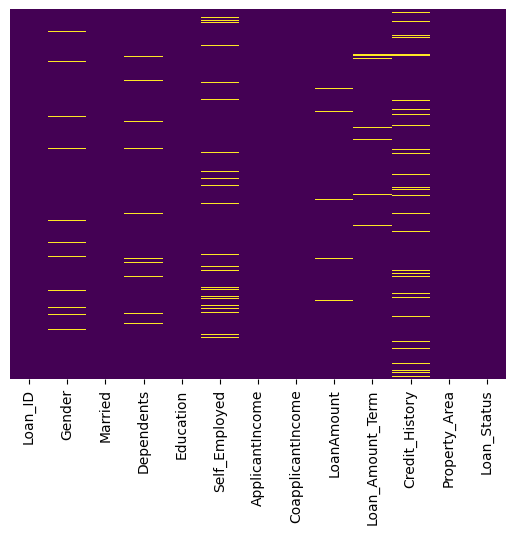

In [7]:
sns.heatmap(train_path.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
train_path.drop(['Loan_ID'],axis=1,inplace=True)

In [9]:
train_path ['Gender'] = train_path ['Gender'].fillna(train_path['Gender'].mode()[0])
train_path ['Married'] = train_path ['Married'].fillna(train_path['Married'].mode()[0])
train_path ['Dependents'] = train_path ['Dependents'].fillna(train_path['Dependents'].mode()[0])
train_path ['Self_Employed'] = train_path ['Self_Employed'].fillna(train_path['Self_Employed'].mode()[0])

In [10]:
train_path ['LoanAmount'] = train_path ['LoanAmount'].fillna(train_path['LoanAmount'].mean())
train_path ['Loan_Amount_Term'] = train_path ['Loan_Amount_Term'].fillna(train_path['Loan_Amount_Term'].mean())
train_path ['Credit_History'] = train_path ['Credit_History'].fillna(train_path['Credit_History'].mean())

In [11]:
train_path.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encoding

In [12]:
obj = (train_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [13]:
label_encoder = preprocessing.LabelEncoder()
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for col in cols:
  train_path[col] = label_encoder.fit_transform(train_path[col])

In [14]:
obj = (train_path.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


# Model Training

In [15]:
from sklearn.model_selection import train_test_split
  
x = train_path.drop(['Loan_Status'],axis=1)
y = train_path['Loan_Status']
x.shape,y.shape
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((220, 11), (147, 11), (220,), (147,))

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7)
logr = LogisticRegression()
#linr = LinearRegression()
svc = SVC()
gbc = GradientBoostingClassifier()
gaussian = GaussianNB()

for clf in (rfc, knn,logr,svc,gbc,gaussian):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_train, y_pred))
    print("r2 score of ", clf.__class__.__name__, "=",metrics.r2_score(y_train, y_pred),"\n")

Accuracy score of  RandomForestClassifier = 98.18181818181819
r2 score of  RandomForestClassifier = 0.8700339683946241 

Accuracy score of  KNeighborsClassifier = 85.0
r2 score of  KNeighborsClassifier = -0.0722197607443511 

Accuracy score of  LogisticRegression = 94.0909090909091
r2 score of  LogisticRegression = 0.5776103972825284 

Accuracy score of  SVC = 83.18181818181817
r2 score of  SVC = -0.202185792349727 



c:\Users\keith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of  GradientBoostingClassifier = 100.0
r2 score of  GradientBoostingClassifier = 1.0 

Accuracy score of  GaussianNB = 94.0909090909091
r2 score of  GaussianNB = 0.5776103972825284 



In [17]:
for clf in (rfc, knn,logr,svc,gbc,gaussian):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy score of ", clf.__class__.__name__, "=",100*metrics.accuracy_score(y_test, y_pred))
    print("r2 score of ", clf.__class__.__name__, "=",metrics.r2_score(y_test, y_pred),"\n")

Accuracy score of  RandomForestClassifier = 91.83673469387756
r2 score of  RandomForestClassifier = 0.6107678729037953 

Accuracy score of  KNeighborsClassifier = 66.66666666666666
r2 score of  KNeighborsClassifier = -0.5893645189761694 

Accuracy score of  LogisticRegression = 91.83673469387756
r2 score of  LogisticRegression = 0.6107678729037953 

Accuracy score of  SVC = 70.06802721088435
r2 score of  SVC = -0.4271844660194173 



c:\Users\keith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of  GradientBoostingClassifier = 93.19727891156462
r2 score of  GradientBoostingClassifier = 0.675639894086496 

Accuracy score of  GaussianNB = 94.5578231292517
r2 score of  GaussianNB = 0.7405119152691968 

